<a href="https://colab.research.google.com/github/Nannanpeng/Heterogeneous_agent_model/blob/master/shooting_algo_cont_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = 1
alpha = 0.3
sigma = 2
pho = delta = 0.05
dt = 0.1
N = 700

In [3]:
k_star = (A*alpha/(pho+delta))**(1/(1-alpha))
c_star = A*k_star**alpha - delta*k_star
print(f"The steady state capital and consumption is {k_star:f} and {c_star:f}.")

The steady state capital and consumption is 4.803987 and 1.361130.


In [6]:
%time
k_0 = k_star/2
c_max = A*k_0**alpha
c_min = 0

k_path = np.empty(N)
c_path = np.empty(N)

iter = 300
tol = 1e-6
err = 1+tol
i = 0
while err > tol and i < iter:
    c_0 = (c_max + c_min)/2
    k_path[0] = k_0
    c_path[0] = c_0
    #print(c_0)
    for n in range(1, N):
        if k_path[n-1] < 0: # avoid negative capital or over-consumption
            break
        c_path[n] = dt*c_path[n-1]*(1/sigma)*(A*alpha*k_path[n-1]**(alpha-1)-pho-delta) + c_path[n-1]
        k_path[n] = dt*(A*k_path[n-1]**alpha - delta*k_path[n-1] - c_path[n-1]) + k_path[n-1]
    err = abs(k_path[-1] - k_star)
    i += 1
    if k_path[-1] < k_star or n < N-1:
        c_max = c_0
    else:
        c_min = c_0

print(f"\nConvergence is reached after {i} iterations.")
print(f"Initial consumption should be {c_0:f}.")
print(f"k_N = {k_path[-1]:f} and c_N = {c_path[-1]:f}.")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs

Convergence is reached after 31 iterations.
Initial consumption should be 1.004474.
k_N = 4.803986 and c_N = 1.358914.


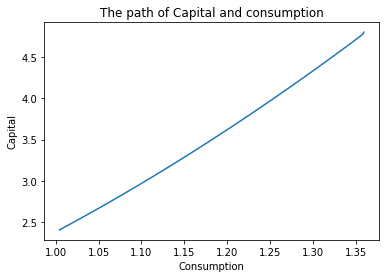

In [5]:
plt.plot(c_path, k_path)
plt.ylabel('Capital')
plt.xlabel('Consumption')
plt.title('The path of Capital and consumption');